Fase 1: Exploración y Limpieza

In [164]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Librerias para imputar nulos
# ------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [165]:
## Cargar las dos bases de datos:

df_flight_activity = pd.read_csv("Customer_Flight_Activity.csv")
df_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [166]:
df_loyalty_history = pd.read_csv("Customer_Loyalty_History.csv")
df_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [167]:
## Exploración básica de los dataset a través de la funcion Exploracion:

def exploracion_df(data):
    print("Las primeras filas del dataset son:")
    print("--------------------------------------------------------")
    print(data.head())
    print("--------------------------------------------------------")
    print("Las columnas del dataset son:")
    print("--------------------------------------------------------")
    print(data.columns)
    print("--------------------------------------------------------")
    print("La forma del dataset es:")
    print("--------------------------------------------------------")
    print(data.shape)
    print("--------------------------------------------------------")
    print("La info de las columnas numéricas del dataset es:")
    print("--------------------------------------------------------")
    print(data.describe)
    print("--------------------------------------------------------")
    print("La info general del dataset es:")
    print("--------------------------------------------------------")
    print(data.info)

In [168]:
# para el dataset Flight Activity
data = df_flight_activity

exploracion_df(data)

Las primeras filas del dataset son:
--------------------------------------------------------
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                   

In [169]:
# para el dataset Loyalty History
data = df_loyalty_history

exploracion_df(data)

Las primeras filas del dataset son:
--------------------------------------------------------
   Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Sta

Informacion relevante sobre los datos:

- el primer df (df_flight_activity) NO tiene nulos y todas las columnas coinciden con el tipo de dato
- el segundo df (df_loyalty_history) SI tiene nulos (columnas 'Salary', 'Cancellation Year' y 'Cancellation Month') y llama atencion el valor negativo de Salary en el valor min, que es un error porque no puede ser negativo y podría dar problemas luego en el análisis

In [170]:
## Unimos todos los datos en un único df para trabajar con el a partir de ahora, en este caso merge porque tienen columna en común: 
# "loyalty_number" por lo que tiene sentido agrupar los datos usando esa referencia

df_unido_merge = df_flight_activity.merge(df_loyalty_history, left_on = 'Loyalty Number', right_on = 'Loyalty Number')
df_unido_merge.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [171]:
## Ahora exploro datos generales del nuevo df

data = df_unido_merge

exploracion_df(data)

Las primeras filas del dataset son:
--------------------------------------------------------
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed Country          Provi

In [172]:
## Compruebo los nulos que tengo para saber que hacer luego con ellos

df_unido_merge.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [173]:
# Antes de continuar con los nulos, retomo la revisión del error en los datos, porque hay por lo menos un salario negativo (el mínimo)

df_unido_merge["Salary"].min()

-58486.0

In [174]:
## quiero ver cuantos valores negativos hay en Salary en total:

df_valores_menor_0 = df_unido_merge[df_unido_merge['Salary'] < 0]
df_valores_menor_0["Salary"].value_counts()

Salary
-10605.0    24
-58486.0    24
-26322.0    24
-12497.0    24
-57297.0    24
-34079.0    24
-46303.0    24
-19332.0    24
-19325.0    24
-49830.0    24
-45962.0    24
-43234.0    24
-17534.0    24
-9081.0     24
-39503.0    24
-47310.0    24
-46683.0    24
-49001.0    24
-31911.0    24
-46470.0    24
Name: count, dtype: int64

In [175]:
df_valores_mayor_0 = df_unido_merge[df_unido_merge['Salary'] > 0]
df_valores_mayor_0["Salary"].value_counts()

Salary
101933.0    552
61809.0     336
62283.0     336
51573.0     336
78573.0     312
           ... 
177400.0     24
60335.0      24
156628.0     24
46008.0      24
56345.0      24
Name: count, Length: 5870, dtype: int64

In [176]:
df_valores_menor_0.shape

(480, 25)

In [177]:
df_valores_mayor_0.shape

(302472, 25)

In [178]:
df_porcentaje_negativos_en_Salary = df_valores_menor_0.shape[0]*100/(df_valores_mayor_0.shape[0] + df_valores_menor_0.shape[0])
df_porcentaje_negativos_en_Salary

0.15844094113919036

In [179]:
## Posible problema con la columna Salary, porque tengo 480 datos negativos, lo cual es un error porque el salario no puede 
# ser negativo. Esos 480 datos representan un 0,15% de todos los datos de Salary (excluyendo los nulos). Es un valor bajo.

# Posibles opciones con los datos erroneos:

# - Eliminar los valores negativos: Si los valores negativos no son relevantes para el análisis, se puede filtrar y 
# que se queden solo con los valores positivos.
# - Reemplazar los valores negativos: para mantener la misma cantidad de datos, se puede reemplazar los valores negativos 
# por un valor que tenga sentido, como cero o la media de los valores positivos.
# - Crear una nueva columna: para conservar la información original, se podría crear una nueva columna que contenga 
# solo los valores no negativos, dejando la columna original intacta.
# - Análisis de la causa: Si los valores negativos son inesperados, podría ser útil investigar por qué están presentes. 
# Podrían ser errores de entrada de datos o representar algo significativo que se debiera considerar.
# - Imputación: si se decide que los valores negativos son errores y no se quiere eliminarlos, se podría considerar 
# técnicas de imputación para estimar valores más apropiados basados en otros datos del dataset

#  Salary es una columna relevante que necesito para el analisis más adelante, por lo que tengo dos posibles opciones 
# con los negativos: 
# - crear una nueva columna de Salary.new (donde solo estarían los valores positivos y los nulos) y trabajar con esta nueva
# - o imputar los valores negativos como nulos, de forma que solo se quedan los positivos y los nulos

In [180]:
#Voy a ver el porcentaje de nulos que tiene de por sí de Salary y decido que hacer

porcentaje_nulos = df_unido_merge.isnull().sum()/df_unido_merge.shape[0]*100
porcentaje_nulos


Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [181]:
nulos = porcentaje_nulos[porcentaje_nulos > 0]
nulos.sort_values(ascending=False)

Cancellation Year     87.657535
Cancellation Month    87.657535
Salary                25.312112
dtype: float64

In [182]:
# Conclusion: salary ya tiene un 25.31% de nulos, por lo que añadir 0,16% (lo correspondiente a los 480 datos negativos 
# convertidos en nulos) no afectaría y considero que es la mejor estrategia a seguir

# Voy a reemplazar los valores negativos de Salary por NaN
df_unido_merge['Salary'] = df_unido_merge['Salary'].where(df_unido_merge['Salary'] >= 0, np.nan)

# Verificar el resultado, para saber que la columna Salary sigue siendo tipo float
print(df_unido_merge['Salary'].dtype)  # Esto debería mostrar 'float64'

float64


In [183]:
# Compruebo que ahora el valor minimo de 'Salary' ya no es negativo
df_unido_merge['Salary'].min()

15609.0

In [184]:
## MAS ADELANTE SIGO VIENDO QUE HACER CON TODOS LOS NULOS (además el porcentaje de nulos en Salary habrá cambiado
#  levemente al sumarle los nuevos nulos)

In [185]:
## Voy a explorar cada tipo de columna para ver que tipos de datos contienen y tomar decisiones de limpieza o transformacion

In [186]:
## columnas objeto

cols_object = df_unido_merge.select_dtypes(include='object')
cols_object

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,Standard
2,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,Standard
3,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,Standard
4,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,Standard
...,...,...,...,...,...,...,...,...,...
405619,Canada,Ontario,Toronto,M1R 4K3,Male,College,Married,Aurora,Standard
405620,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,Single,Nova,Standard
405621,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,Married,Nova,Standard
405622,Canada,British Columbia,Victoria,V10 6T5,Male,College,Married,Star,Standard


In [187]:
for col in df_unido_merge.select_dtypes(include='object'):
    print('-----------------------------')
    print('Para la columna:', col)
    print('-----------------------------')
    print('Los valores unicos son')
    print(df_unido_merge[col].unique())
    print('-----------------------------')
    print('Hay tantos valores:')
    print(df_unido_merge[col].value_counts())

-----------------------------
Para la columna: Country
-----------------------------
Los valores unicos son
['Canada']
-----------------------------
Hay tantos valores:
Country
Canada    405624
Name: count, dtype: int64
-----------------------------
Para la columna: Province
-----------------------------
Los valores unicos son
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
-----------------------------
Hay tantos valores:
Province
Ontario                 130896
British Columbia        106848
Quebec                   79968
Alberta                  23400
Manitoba                 15984
New Brunswick            15432
Nova Scotia              12576
Saskatchewan              9936
Newfoundland              6312
Yukon                     2688
Prince Edward Island      1584
Name: count, dtype: int64
-----------------------------
Para la columna: City
-----------------------------
Los valor

In [188]:
## Conclusion columnas tipo object:
# - Todas las columnas tipo objeto tienen sentido

In [189]:
## Ahora voy con los valores de las columnas tipo int

cols_int = df_unido_merge.select_dtypes(include='int')
cols_int

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,0,0,2016,8
1,100102,2017,1,10,4,14,2030,0,0,2013,3
2,100140,2017,1,6,0,6,1200,0,0,2016,7
3,100214,2017,1,0,0,0,0,0,0,2015,8
4,100272,2017,1,0,0,0,0,0,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0,0,2014,5
405620,999911,2018,12,0,0,0,0,0,0,2012,8
405621,999940,2018,12,3,0,3,1233,0,0,2017,7
405622,999982,2018,12,0,0,0,0,0,0,2018,7


In [190]:
for col in df_unido_merge.select_dtypes(include='int'):
    print('-----------------------------')
    print('Para la columna:', col)
    print('-----------------------------')
    print('Los valores unicos son')
    print(df_unido_merge[col].unique())
    print('-----------------------------')
    print('Hay tantos valores:')
    print(df_unido_merge[col].value_counts())

-----------------------------
Para la columna: Loyalty Number
-----------------------------
Los valores unicos son
[100018 100102 100140 ... 999731 999788 999891]
-----------------------------
Hay tantos valores:
Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64
-----------------------------
Para la columna: Year
-----------------------------
Los valores unicos son
[2017 2018]
-----------------------------
Hay tantos valores:
Year
2017    202812
2018    202812
Name: count, dtype: int64
-----------------------------
Para la columna: Month
-----------------------------
Los valores unicos son
[ 1  9  2  3 11  4  5  7  6  8 10 12]
-----------------------------
Hay tantos valores:
Month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dty

In [191]:
## conclusion columnas tipo int:
# - Creo que hay 4 columnas tipo int (month, year, enrollment year y enrollment month) que tendría más sentido 
# que fueran categóricas ya que esto facilitaría el analisis e interpretación de resultados, así como la visualizacion

In [192]:
# Transformacion de estas 4 columnas a catégorias:

df_unido_merge['Year'] = df_unido_merge['Year'].astype('object')
df_unido_merge['Month'] = df_unido_merge['Month'].astype('object')
df_unido_merge['Enrollment Year'] = df_unido_merge['Enrollment Year'].astype('object')
df_unido_merge['Enrollment Month'] = df_unido_merge['Enrollment Month'].astype('object')

In [193]:
## Por último las columnas tipo float

cols_float = df_unido_merge.select_dtypes(include='float')
cols_float

,Points Accumulated,Salary,CLV,Cancellation Year,Cancellation Month
0,152.0,92552.0,7919.20,NaN,NaN
1,203.0,NaN,2887.74,NaN,NaN
2,120.0,NaN,2838.07,NaN,NaN
3,0.0,63253.0,4170.57,NaN,NaN
4,0.0,91163.0,6622.05,NaN,NaN
...,...,...,...,...,...
405619,0.0,NaN,7290.07,NaN,NaN
405620,0.0,217943.0,8564.77,NaN,NaN
405621,123.0,47670.0,20266.50,NaN,NaN
405622,0.0,NaN,2631.56,NaN,NaN


In [194]:
for col in df_unido_merge.select_dtypes(include='float'):
    print('-----------------------------')
    print('Para la columna:', col)
    print('-----------------------------')
    print('Los valores unicos son')
    print(df_unido_merge[col].unique())
    print('-----------------------------')
    print('Hay tantos valores:')
    print(df_unido_merge[col].value_counts())

-----------------------------
Para la columna: Points Accumulated
-----------------------------
Los valores unicos son
[152.   203.   120.   ...  18.75 601.   626.  ]
-----------------------------
Hay tantos valores:
Points Accumulated
0.00      197992
180.00       763
270.00       734
288.00       717
189.00       709
           ...  
658.50         1
556.25         1
10.80          1
565.50         1
626.00         1
Name: count, Length: 1549, dtype: int64
-----------------------------
Para la columna: Salary
-----------------------------
Los valores unicos son
[92552.    nan 63253. ... 23160. 97206. 56345.]
-----------------------------
Hay tantos valores:
Salary
101933.0    552
61809.0     336
62283.0     336
51573.0     336
78573.0     312
           ... 
177400.0     24
60335.0      24
156628.0     24
46008.0      24
56345.0      24
Name: count, Length: 5870, dtype: int64
-----------------------------
Para la columna: CLV
-----------------------------
Los valores unicos son
[7919

In [195]:
## Conclusion columnas tipo float:
# - Todas tienen sentido con este tipo de dato, para analisis y visualización posterior

In [196]:
## Info para ver como quedan los tipos de columnas después de aplicar la transformación de datos 

df_unido_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  object 
 2   Month                        405624 non-null  object 
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [197]:
## ELIMINO NULOS DE LAS 3 COLUMNAS con nulos

nuevo_porcentaje_nulos = df_unido_merge.isnull().sum()/df_unido_merge.shape[0]*100
nuevo_porcentaje_nulos

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.430448
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [198]:
nulos_2 = porcentaje_nulos[porcentaje_nulos > 0]
nulos_2.sort_values(ascending=False)

Cancellation Year     87.657535
Cancellation Month    87.657535
Salary                25.312112
dtype: float64

In [199]:
## Hay 3 columnas con nulos: 'Cancellation Year', 'Cancellation Month' y 'Salary'. 
# Realmente de las tres creo que la única relevante para el analisis va a ser 'Salary', las otros dos no parecen muy importantes y con tanto porcentaje de 
# nulo se podría optar por eliminar la columna directamente. 
# Pero en este caso, como solo son tres las columnas a revisar en cuanto a nulos, prefiero mantenerlas y seguir misma estrategia que con Salary 

## Las tres son de tipo numérico y con alto porcentaje de nulos, por lo que la estrategía a seguir es:
# - IMPUTAR CON TÉCNICAS MÁS AVANZADAS: voy a probar con IterativeImputer y KNNImputer, comparamos recultados y elijo

In [200]:
# como voy a crear columnas nuevas, voy a hacer una copia del DataFrame usando copy()
df_copia = df_unido_merge.copy()
df_copia.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [201]:
# para las tres columnas con nulos aplico los dos métodos de imputación para luego comparar resultados y quedarme con uno, 
# empiezo por IterativeImputer

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["Cancellation Year", "Cancellation Month", "Salary"]])
imputer_iterative_imputado

array([[2.01636936e+03, 6.76758112e+00, 9.25520000e+04],
       [2.01649484e+03, 6.95929965e+00, 7.93721665e+04],
       [2.01649484e+03, 6.95929965e+00, 7.93721665e+04],
       ...,
       [2.01679668e+03, 7.42045086e+00, 4.76700000e+04],
       [2.01649484e+03, 6.95929965e+00, 7.93721665e+04],
       [2.01680693e+03, 7.43610274e+00, 4.65940000e+04]])

In [202]:
# ahora creo las columnas nuevas
df_copia[["Cancellation_year_iterative", "Cancellation_month_iterative", "Salary_iterative"]] = imputer_iterative_imputado

# comprobamos que tengo 0 nulos en las nuevas columnas 
print(f"Después del 'Iterative' tenemos: \n{df_copia[['Cancellation_year_iterative', 'Cancellation_month_iterative', 'Salary_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
Cancellation_year_iterative     0
Cancellation_month_iterative    0
Salary_iterative                0
dtype: int64 nulos


In [203]:
# Ahora utilizamos 'describe()' para ver si los estadísticos antes y después de la inputación han cambiado mucho

df_copia.describe()[["Cancellation Year", "Cancellation_year_iterative", "Cancellation Month", "Cancellation_month_iterative", "Salary", "Salary_iterative"]].round(3)

,Cancellation Year,Cancellation_year_iterative,Cancellation Month,Cancellation_month_iterative,Salary,Salary_iterative
count,50064.000,405624.000,50064.000,405624.000,302472.000,405624.000
mean,2016.500,2016.495,6.966,6.959,79451.016,79372.166
std,1.384,0.555,3.448,1.278,34713.919,31014.003
min,2013.000,2013.000,1.000,1.000,15609.000,-742.217
25%,2016.000,2016.438,4.000,6.876,59278.000,63032.000
50%,2017.000,2016.495,7.000,6.959,73523.000,79372.166
75%,2018.000,2016.672,10.000,7.218,88630.000,84015.000
max,2018.000,2018.000,12.000,12.000,407228.000,407228.000


In [204]:
## Al comprobar los datos originales con la columna de datos imputados vemos que en ninguno de los tres cambia mucho ni la media ni la mediana

In [205]:
# he tratado de probar con KNNImputer para comprobar si los resultados daban muy distintos, pero al ser un conjunto de datos muy grande el proceso 
# era demasiado lento y no tiene sentido

'''imputer_knn = KNNImputer(n_neighbors = 5)
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Cancellation Year", "Cancellation Month", "Salary"]])
imputer_knn_imputado'''

'imputer_knn = KNNImputer(n_neighbors = 5)\nimputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Cancellation Year", "Cancellation Month", "Salary"]])\nimputer_knn_imputado'

In [206]:
# Ahora elimino las columnas que ya no interesan ('Cancellation Year', 'Cancellation Month' y 'Salary') y me quedo con las imputadas sin nulos

df_copia.drop(["Salary", "Cancellation Year", "Cancellation Month"], axis = 1, inplace = True)
df_copia.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation_year_iterative,Cancellation_month_iterative,Salary_iterative
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


In [207]:
# Voy a cambiar el nombre de las columnas que quedaron sin nulos para que tengan el mismo nombre que las de origen
nuevo_nombre = {"Cancellation_year_iterative": "Cancellation Year",  'Cancellation_month_iterative': "Cancellation Month", "Salary_iterative": "Salary"}
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [208]:
## Compruebo que no tiene ningun nulo
df_copia.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Salary                         0
dtype: int64

In [209]:
## Una vez eliminados los nulos, voy a ver los duplicados

total_duplicados = df_copia.duplicated().sum() 
print(f"Duplicados encontrados: {total_duplicados}")

Duplicados encontrados: 1864


In [210]:
## duplicados por columnas, pero en este caso tiene sentido que haya duplicados en cada columna porque muchos datos son comunes para diferentes registros

for col in df_copia:
    print("para la columna:", col)
    print(df_copia.duplicated(subset = col).sum()) 

para la columna: Loyalty Number
388887
para la columna: Year
405622
para la columna: Month
405612
para la columna: Flights Booked
405602
para la columna: Flights with Companions
405612
para la columna: Total Flights
405591
para la columna: Distance
400878
para la columna: Points Accumulated
404075
para la columna: Points Redeemed
405037
para la columna: Dollar Cost Points Redeemed
405575
para la columna: Country
405623
para la columna: Province
405613
para la columna: City
405595
para la columna: Postal Code
405569
para la columna: Gender
405622
para la columna: Education
405619
para la columna: Marital Status
405621
para la columna: Loyalty Card
405621
para la columna: CLV
397640
para la columna: Enrollment Type
405622
para la columna: Enrollment Year
405617
para la columna: Enrollment Month
405612
para la columna: Cancellation Year
399961
para la columna: Cancellation Month
399955
para la columna: Salary
399689


In [211]:
# como voy a eliminar duplicados, voy a hacer una copia del DataFrame usando copy()
df_copia_2 = df_copia.copy()
df_copia_2.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


In [212]:
df_sin_duplicados = df_copia_2.drop_duplicates(keep = False)

In [213]:
df_sin_duplicados.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


In [214]:
# Compruebo que ya no contiene duplicados

total_duplicados2 = df_sin_duplicados.duplicated().sum() 
print(f"Duplicados encontrados: {total_duplicados2}")

Duplicados encontrados: 0


In [215]:
df_sin_duplicados.shape

(401912, 25)

In [216]:
df_final = df_sin_duplicados.copy()
df_final.shape

(401912, 25)

In [217]:
print ("Ya tengo el df final con el que voy a trabajar en las siguientes fases: df_final (sin nulos, sin duplicados y con las columnas preparadas)")

Ya tengo el df final con el que voy a trabajar en las siguientes fases: df_final (sin nulos, sin duplicados y con las columnas preparadas)


Fase 2: Visualización

Usando herramientas de visualización, voy a visulizar y analizar siguientes cuestiones:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

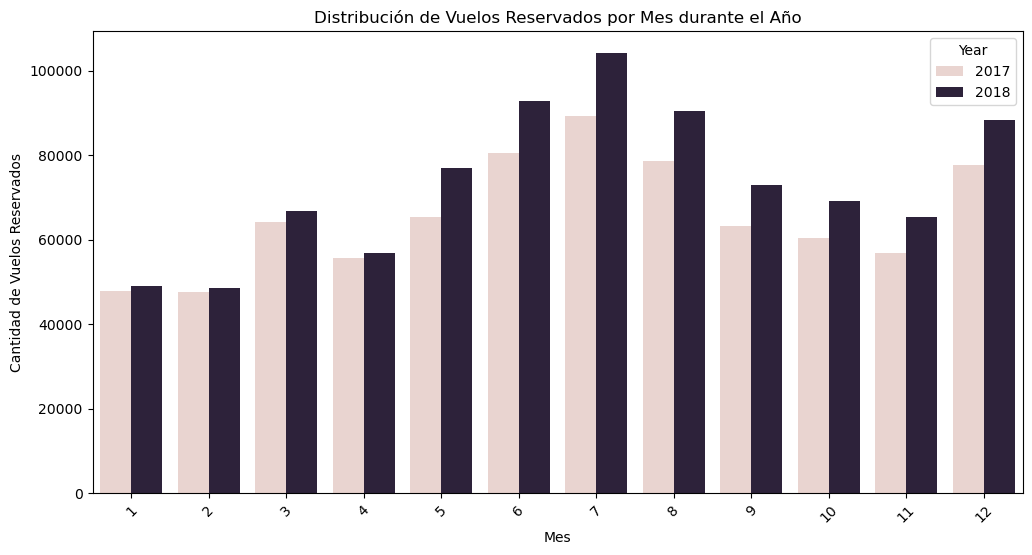

In [218]:
df_grouped = df_final.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Flights Booked', data=df_grouped, hue='Year')

plt.title('Distribución de Vuelos Reservados por Mes durante el Año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.xticks(rotation=45)
plt.show()

Interpretación: 
Podemos sacar dos conclusiones:
- en primer lugar de manera visual podemos ver que los meses más fuertes en cuanto a reservas son junio, julio, agosto y diciembre; lo cual tiene sentido ya que son los principales meses asociados a periodos de vacaciones. 
- además vemos que hay un crecimiento en todos los meses del 2018 (barra negra) en comparación con el mes respectivo del 2017 (barra rosa), lo cual es un buen dato ya que siginifica que las ventas de la compañía siguen creciendo.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [219]:
## Tenemos que combinar distancia ("distance") de tipo numérico + puntos acumulados por cliente ("Points Accumulated") de tipo 
# numérico también --> 2 variables numericas --> opciones: scatterplot, regplot para explorar la relación y correlacion entre ellas

Text(0, 0.5, 'Points Accumulated')

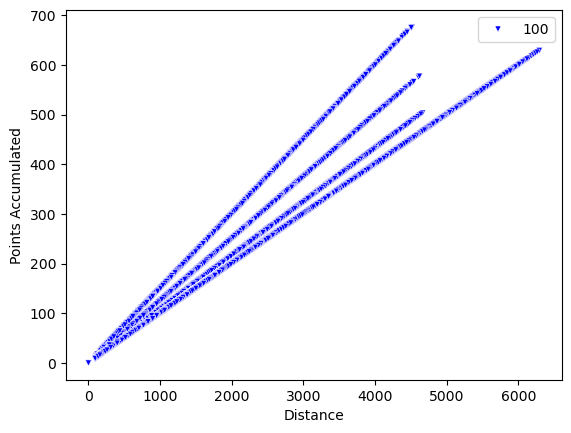

In [220]:
## Calculo scatterplot para visualizar si hay alguna tendencia o patrón en los datos

sns.scatterplot(x = "Distance", 
                y = "Points Accumulated", 
                data = df_final, 
                size = 100, 
                marker= "v",
                color = "blue")
plt.xlabel("Distance")
plt.ylabel("Points Accumulated")

In [221]:
## Los gráficos de visualización parecen mostrar una relación bastante lineal entre ambas variables, pero aun así vamos a 
# aplicar coeficiente correlación

print('Correlación Pearson:', df_final['Distance'].corr(df_final['Points Accumulated'], method='pearson'))

Correlación Pearson: 0.9945277510679301


In [222]:
## Interpretacion: correlación positiva fuerte

Text(0.5, 0, 'Distance')

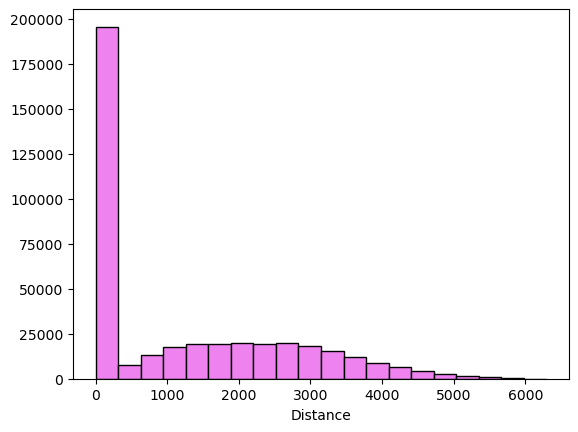

In [223]:
## Para poder interpretar los resultados de correlación de la manera más fiable posible, compruebo homogeneiad de normalidad y varianza

# Distibucion Normalidad: primero con gráfico de distribución de las variables distancia y puntos acumulados, visualizando 
# en histograma cada una de las variables

# Histograma para Distance
plt.hist(x = "Distance", 
         data = df_final, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black")
plt.xlabel("Distance")

Text(0.5, 0, 'Points Accumulated')

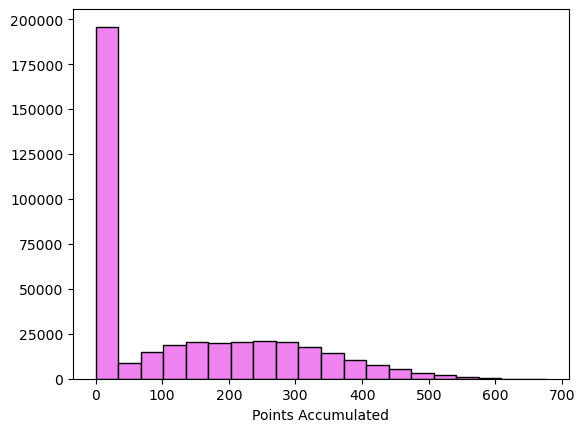

In [224]:
# Histograma para Points Accumulated

plt.hist(x = "Points Accumulated", 
         data = df_final, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black")
plt.xlabel("Points Accumulated")

In [225]:
### Visualmente no se aprecia distribución normal, pero utilizo funcion para comprobar la distribucion de las variables Distance y Points Accumulated

def check_normalidad(data):
    n = len(data)
    if n <= 5000:
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')
    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    return {
        "Prueba": test_name,
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }

In [226]:
# Compruebo normalidad en "Distance"

data = df_final["Distance"]
check_normalidad(data)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5166106013256633,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [227]:
# Compruebo normalidad en "Points Accumulated"

data2 = df_final["Points Accumulated"]
check_normalidad(data2)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5166106013256633,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [228]:
## Interpretacion: los datos no siguen una distribucion normal, por lo que voy a usar el coeficiente de correlación de Spearman, 
# que es un método no paramétrico y no requiere que los datos sigan una distribución normal 

print('Correlación Spearman:', df_final['Distance'].corr(df_final['Points Accumulated'], method='spearman'))


Correlación Spearman: 0.99801900382309


Interpretacion: una correlación de Spearman de 0.99 indica una relación muy fuerte y positiva, viene a decir que a medida que una variable aumenta, la otra también tiende a aumentar, pero no necesariamente de manera lineal. Se basa en rangos de datos, por lo que un valor de 0.99 sugiere que, en la mayoría de los casos, los rangos de las dos variables están muy alineados. Es decir, si una variable tiene un rango alto, la otra también tiende a tener un rango alto. 

Una correlación de 0.99 sugiere que hay una relación muy consistente entre las dos variables, en este caso estamos analizando distancia y puntos acumulados, por lo que a mayor distancia recorrida, más puntos acumulados.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

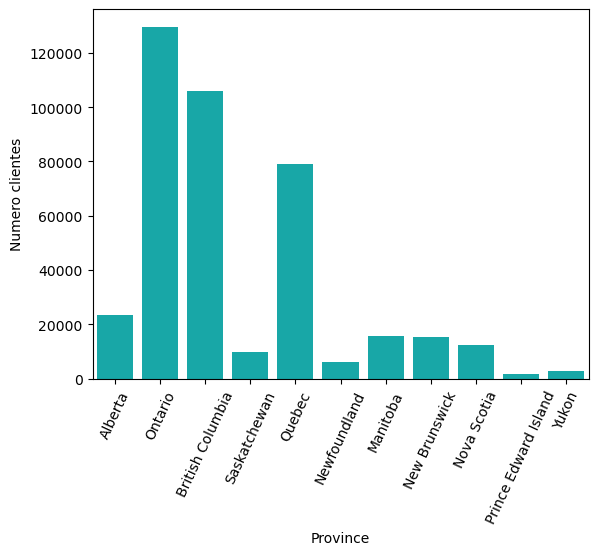

In [229]:
# Province es una variable tipo object, para ver como se distriuye una variable categórica --> utilizo countplot

distribucion_provincias = df_final["Province"].value_counts().index
sns.countplot(x="Province", data=df_final, color ='c')
plt.xticks(rotation=65)
plt.xlabel("Province")
plt.ylabel("Numero clientes")
plt.show()

In [230]:
df_final["Province"].value_counts()

Province
Ontario                 129620
British Columbia        106036
Quebec                   79194
Alberta                  23320
Manitoba                 15816
New Brunswick            15272
Nova Scotia              12438
Saskatchewan              9786
Newfoundland              6176
Yukon                     2670
Prince Edward Island      1584
Name: count, dtype: int64

In [231]:
provincias = df_final["Province"].value_counts()
provincias = provincias.to_frame(name='Numero clientes').reset_index()
provincias

,Province,Numero clientes
0,Ontario,129620
1,British Columbia,106036
2,Quebec,79194
3,Alberta,23320
4,Manitoba,15816
5,New Brunswick,15272
6,Nova Scotia,12438
7,Saskatchewan,9786
8,Newfoundland,6176
9,Yukon,2670


In [232]:
total_clientes = provincias["Numero clientes"].sum()
provincias.info()
provincias_mas_clientes = provincias[provincias["Numero clientes"]>50000]
provincias_mas_clientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Province         11 non-null     object
 1   Numero clientes  11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


,Province,Numero clientes
0,Ontario,129620
1,British Columbia,106036
2,Quebec,79194


In [233]:
clientes_Ontario = provincias_mas_clientes.iloc[0,1]
print("El total de clientes de Ontario es:", clientes_Ontario)
porcentaje_clientes_Ontario = (clientes_Ontario/total_clientes).round(4)*100
print("El porcentaje de clientes de Ontario respecto al total representa el:", porcentaje_clientes_Ontario,"%")
clientes_British_Columbia = provincias_mas_clientes.iloc[1,1]
print("El total de clientes de British Columbia es:", clientes_British_Columbia)
porcentaje_clientes_British_Columbia = (clientes_British_Columbia/total_clientes).round(4)*100
print("El porcentaje de clientes de British Columbia respecto al total representa el:", porcentaje_clientes_British_Columbia,"%")
clientes_Quebec = provincias_mas_clientes.iloc[2,1]
print("El total de clientes de Quebec es:", clientes_Quebec)
porcentaje_clientes_Quebec = (clientes_Quebec/total_clientes).round(4)*100
print("El porcentaje de clientes de Quebec respecto al total representa el:", porcentaje_clientes_Quebec,"%")

El total de clientes de Ontario es: 129620
El porcentaje de clientes de Ontario respecto al total representa el: 32.25 %
El total de clientes de British Columbia es: 106036
El porcentaje de clientes de British Columbia respecto al total representa el: 26.38 %
El total de clientes de Quebec es: 79194
El porcentaje de clientes de Quebec respecto al total representa el: 19.7 %


Interpretacion: 
- visualmente se aprecia que hay tres provincias con un número de clientes muy por encima del resto, estas son Ontario, British Columbia y Quebec.  El resto de clientes se distribuye entre las siete provincias restantes, y aunque los datos están bastante repartidos, hay dos provincias con un nivel bastante inferior de clientes.

- gracias al crosstab podemos comparar los datos numéricos y sacar conclusiones que necesitemos más adelante. Vemos que las tres provincias con más clientes agrupan el 60,60% del total. (32,25%, 26,38% y 19,7% respectivamente). Se trata de tres de las provincias más grandes y pobladas de Canadá, con lo cual era un dato esperable. El resto de clientes (39,4%) se distribuye entre las 7 provincias restantes.

4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [234]:
## Tengo que unir salario ("Salary") calculando la media (mean) + nivel educativo

salario_nivel_educativo = df_final.groupby("Education")["Salary"].mean().round(2).sort_values().reset_index
salario_nivel_educativo

<bound method Series.reset_index of Education
High School or Below     61218.38
Bachelor                 72665.01
College                  79167.95
Master                  103701.29
Doctor                  178472.88
Name: Salary, dtype: float64>

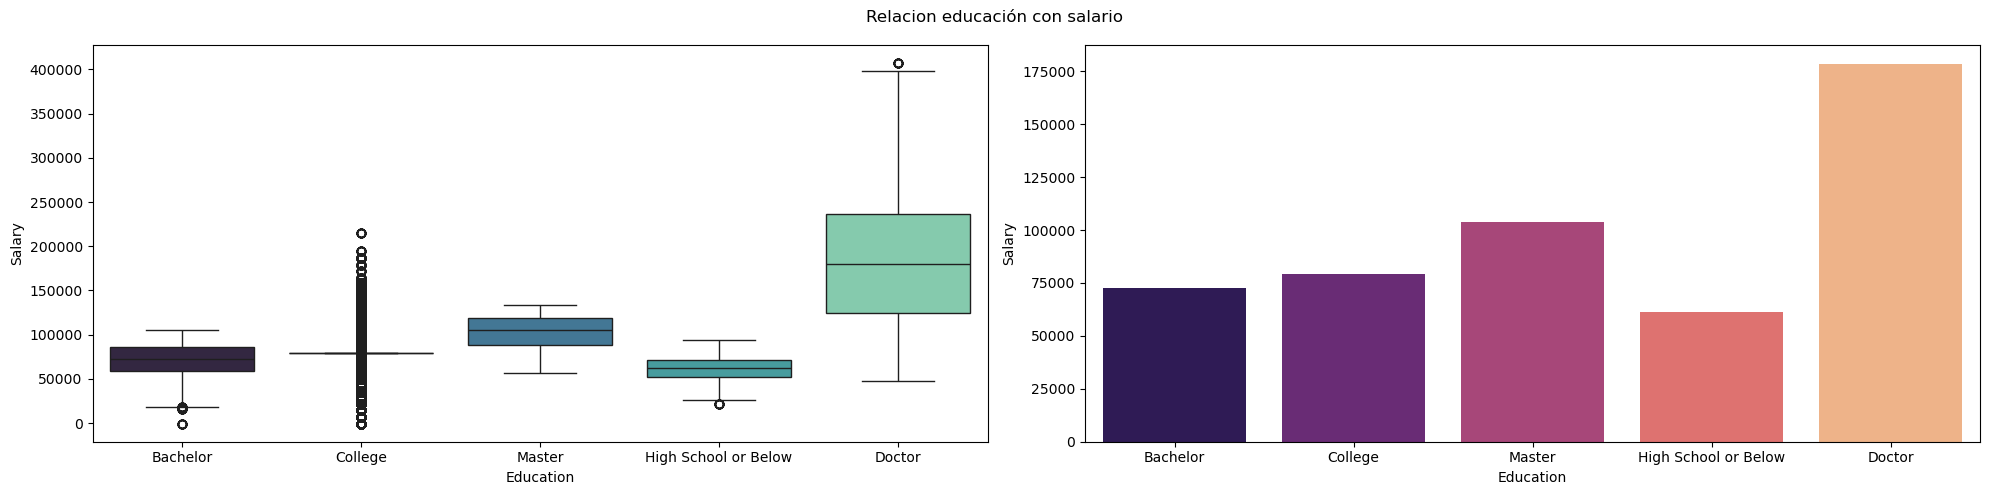

In [235]:
## Para visualizar estamos combinando variable categórica ("education") con numérica ("Salary") --> boxplot, barplot

## Primero boxplot: vemos como se distribuyen todos los valores segun nivel educativo
## Luego barplot nos devuelve un gráfico donde se observa la relación entre salario (valor medio) y educación de los clientes

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(x = "Education", 
            y = "Salary", 
            data = df_final, 
            ax = axes[0], 
            palette= "mako")

sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_final,
            ci = None,
            ax = axes[1], 
            palette = "magma")
plt.suptitle("Relacion educación con salario")
plt.tight_layout()

Interpretacion: se observan grandes diferencias en el salario en función del grupo educativo al que pertenecen los clientes:
- tenemos un grupo que destaca por encima del resto en cuanto al promedio de salario, se trata de la categoría Doctor que casi tripica en salario medio al grupo con menos salario promedio (High School). Además con el boxplot vemos que esta categoría tiene la distribucion de valores más amplia de los 5 grupos y tiene un outlier que están muy por encima del promedio, por lo que de cara a un analisis más detallado de este grupo habría que estudiar que hacer con ese valor porque seguramente está "afectando" a valores clave como promedio, desviación.

- luego tenemos el grupo Master, que tiene los datos muy agrupados, por lo que la varianza en cuanto a los salarios de los clientes de esa categoría no es muy amplia, además es la única categoría sin outliers.  

- y por último tenemos tres grupos muy parecidos en cuanto al promedio de salarios, que serían Bachelor, College y High School. Con el boxplot podemos apreciar que tanto Bachelor como High School tiene outliers con valores ligeramente inferiores a los valores centrales, seguramente habria que hacer algo con ellos para que no afecten a los datos descriptivos. Y por último la distribucion de los datos College, que es muy diferente al del resto de categorias, de hecho no tiene la forma típica de caja y tiene muchos outliers, por lo que aqui habría que analizarlo muy detalladamente.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [236]:
## Proporcion --> grafico porcentajes: pie chat
## Recorrer variable tarjetas fidelidad ("Loyalty Card") que es categórica y ver la proporcion de clientes (count) que hay de 
# cada tipo

# -- Pie Chat: preparación de datos groupby + pie
# Primero preparo datos:

tipo_tarjeta_fidelidad = df_final.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()
tipo_tarjeta_fidelidad

,Loyalty Card,Loyalty Number
0,Aurora,82432
1,Nova,136214
2,Star,183266


In [237]:
## Además de ver el total de clientes por tipo de tarjeta, quiero ver el porcentaje en números, antes de visualizarlo. 
# Para ello calculo el total de tarjetas/clientes y veo el porcentaje de cada una

total_tarjeta_fidelidad = tipo_tarjeta_fidelidad["Loyalty Number"].sum()
total_tarjeta_fidelidad

401912

In [238]:
porcentaje_tarjeta_fidelidad = (tipo_tarjeta_fidelidad["Loyalty Number"]/total_tarjeta_fidelidad).round(4)*100
porcentaje_tarjeta_fidelidad.reset_index()

,index,Loyalty Number
0,0,20.51
1,1,33.89
2,2,45.60


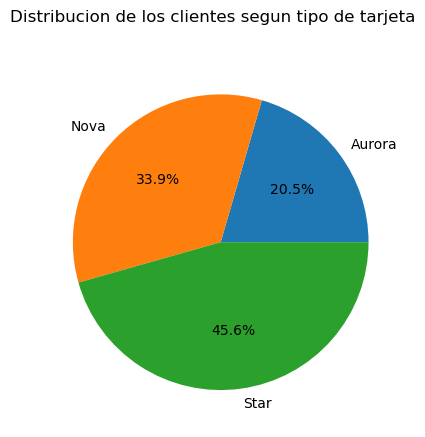

In [239]:
## Ahora aplico Pie Chat para ver como se distribuyen esos resultados:

plt.pie("Loyalty Number", labels= "Loyalty Card", autopct='%1.1f%%', data = tipo_tarjeta_fidelidad)
plt.suptitle("Distribucion de los clientes segun tipo de tarjeta")
plt.show()


Interpretacion: se aprecia que de los tres tipos de tarjeta disponibles casi la mitad de clientes (el 45,6%) tienen la de categoria Star, por lo que esta categoría es la más popular y es significativamente más representativa del total. El resto se distribuye entre las otras dos categorías, aunque entre ellas predomina la tipo Nova con casi 34% de los clientes.  

6.  ¿Cómo se distribuyen los clientes según su estado civil y género?

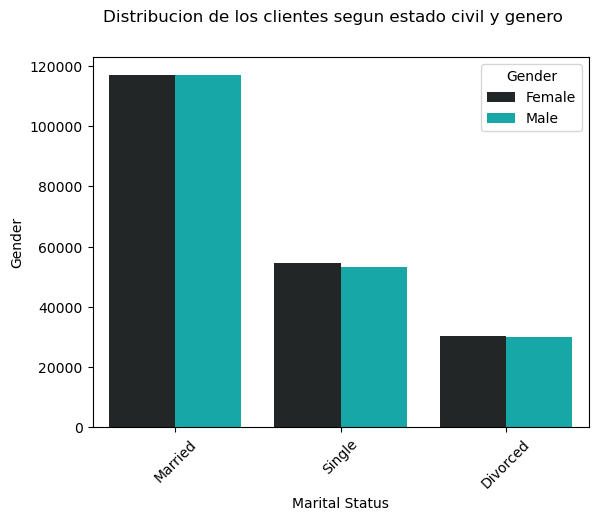

In [240]:
## Tengo que unir estado civil (Marital Status) y genero (Gender), ambas tipo object --> countplot + hue o crosstab

# Gráfico barras (countplot + hue)
estado_civil_genero = df_final['Marital Status'].value_counts().index
sns.countplot(x='Marital Status', data=df_final, color = 'c', order=estado_civil_genero, hue = 'Gender')
plt.xticks(rotation=45)
plt.xlabel("Marital Status")
plt.ylabel("Gender")
plt.suptitle("Distribucion de los clientes segun estado civil y genero")
plt.show()

In [241]:
## A simple vista vemos que la distribucion de los datos parece muy similar en cuanto a genero y estado civil, pero voy a 
# hacer ahora un crosstab, para ver los datos númericos de cada combinación 

crosstab_estado_civil_genero = pd.crosstab(df_final['Marital Status'], df_final['Gender'])
crosstab_estado_civil_genero

Gender,Female,Male
Marital Status,,
Divorced,30380,29968
Married,116910,116996
Single,54584,53074


In [242]:
## Vamos a analizar los porcentajes de datos para mujeres segun estado civil:

datos_mujeres = crosstab_estado_civil_genero["Female"].sum()
print("El dato total de mujeres es:", datos_mujeres, "mujeres")
mujeres_divorciadas = crosstab_estado_civil_genero.iloc[0,0]
porcentaje_mujeres_divorciadas = (mujeres_divorciadas / datos_mujeres).round(3)*100
print("El porcentaje de mujeres divorciadas es:", porcentaje_mujeres_divorciadas)
mujeres_casadas = crosstab_estado_civil_genero.iloc[1,0]
porcentaje_mujeres_casadas = (mujeres_casadas / datos_mujeres).round(3)*100
print("El porcentaje de mujeres casadas es:", porcentaje_mujeres_casadas)
mujeres_solteras = crosstab_estado_civil_genero.iloc[2,0]
porcentaje_mujeres_solteras = (mujeres_solteras / datos_mujeres).round(3)*100
print("El porcentaje de mujeres solteras es:", porcentaje_mujeres_solteras)

El dato total de mujeres es: 201874 mujeres
El porcentaje de mujeres divorciadas es: 15.0
El porcentaje de mujeres casadas es: 57.9
El porcentaje de mujeres solteras es: 27.0


In [243]:
## Ahora hacemos lo mismo con los datos para los hombres:

datos_hombres = crosstab_estado_civil_genero["Male"].sum()
print("El dato total de hombres es:", datos_hombres, "hombres")
hombres_divorciados = crosstab_estado_civil_genero.iloc[0,1]
porcentaje_hombres_divorciados = (hombres_divorciados / datos_hombres).round(3)*100
print("El porcentaje de hombres divorciados es:", porcentaje_hombres_divorciados)
hombres_casados = crosstab_estado_civil_genero.iloc[1,1]
porcentaje_hombres_casados = (hombres_casados / datos_hombres).round(3)*100
print("El porcentaje de hombres casados es:", porcentaje_hombres_casados)
hombres_solteros = crosstab_estado_civil_genero.iloc[2,1]
porcentaje_hombres_solteros = (hombres_solteros / datos_hombres).round(3)*100
print("El porcentaje de hombres solteros es:", porcentaje_hombres_solteros)


El dato total de hombres es: 200038 hombres
El porcentaje de hombres divorciados es: 15.0
El porcentaje de hombres casados es: 58.5
El porcentaje de hombres solteros es: 26.5


Interpretacion: 
- Vemos que practicamente el total de datos que tenemos para mujeres y hombres es el mismo (201874 datos recopilados de mujeres frente a 200038 datos de hombres), donde mujeres representa el 50,22% de los datos totales y hombres el 49,77%, esta distribución es importante de cara a la interpretacion de resultados de las respectivas muestras. 

- Si comparamos los datos en función del estado civil vemos que en los tres casos la distibucion es muy similar, en ambos grupos predomina el porcentaje de clientes casados (en mujeres representa casi el 58% del total y en hombres el 58,5%) y el grupo menos abundante en amos casos es el de divorciados, con un 15% en ambos casos. 

Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1.  Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
2.  Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.
3.  Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [244]:
reservas_nivel_educativo = df_final.groupby('Education')['Flights Booked'].count()
reservas_nivel_educativo

Education
Bachelor                251398
College                 101848
Doctor                   17606
High School or Below     18822
Master                   12238
Name: Flights Booked, dtype: int64

In [245]:
## Convierto reservas_nivel_educativo en un df para poder trabajar con el:

reservas_nivel_educativo = reservas_nivel_educativo.to_frame(name='porcentajes_reservas').reset_index().rename(columns={'index': 'var'})
reservas_nivel_educativo

,Education,porcentajes_reservas
0,Bachelor,251398
1,College,101848
2,Doctor,17606
3,High School or Below,18822
4,Master,12238


In [246]:
## Renombro columna del df para que tenga más sentido

reservas_nivel_educativo.rename(columns = {'porcentajes_reservas': 'Total reservas'}, inplace = True)
reservas_nivel_educativo

,Education,Total reservas
0,Bachelor,251398
1,College,101848
2,Doctor,17606
3,High School or Below,18822
4,Master,12238


In [247]:
reservas_nivel_educativo.describe().round(2)

,Total reservas
count,5.00
mean,80382.40
std,102568.67
min,12238.00
25%,17606.00
50%,18822.00
75%,101848.00
max,251398.00


In [248]:
total = reservas_nivel_educativo["Total reservas"].sum()
print("El total de reservas de todos los datos agrupados segun niveles educativos es:", total)
media = reservas_nivel_educativo["Total reservas"].mean()
print("La media de reservas en los datos agrupados segun niveles educativos es:", media)
mediana = reservas_nivel_educativo["Total reservas"].median()
print("La mediana de reservas en los datos agrupados segun niveles educativos es:", mediana)
desviacion = reservas_nivel_educativo["Total reservas"].std()
print("La desviacion de reservas en los datos agrupados segun niveles educativos es:", desviacion)

El total de reservas de todos los datos agrupados segun niveles educativos es: 401912
La media de reservas en los datos agrupados segun niveles educativos es: 80382.4
La mediana de reservas en los datos agrupados segun niveles educativos es: 18822.0
La desviacion de reservas en los datos agrupados segun niveles educativos es: 102568.66714937851


In [249]:
## Prueba estadística

##### Pasos
#1. Extracción de muestra de datos 
#2. Cálculo de métricas: media y std 
#3. Cálculo de tamaño de muestra 
#4. Elección de intervalo de confianza 
#5. Aplicación de fórmula para calcular el intervalo de confianza 
#6. Resultado (interpretacion)

In [250]:
# Calculo intervalo de confianza

media_muestra = df_final["Flights Booked"].mean()
desviacion_muestra = df_final["Flights Booked"].std()
muestra = df_final["Flights Booked"]
longitud = len(df_final["Flights Booked"])

print("La media de la muestra es:", media_muestra)
print("La desviación de la muestra es:", desviacion)
print("La longitud de la muestra es:", longitud)
print("El nivel de confianza es: 0,95")

confidence_interval = stats.t.interval(
    confidence=0.95,         
    df=longitud-1,             
    loc=media_muestra,  
    scale= desviacion_muestra / np.sqrt(longitud)  
)

print("---------------------------------------")
print(f"Media: {media_muestra:.2f} reservas")
print(f"Intervalo de Confianza al 95%: {confidence_interval}")

print("---------------------------------------")
print("Interpretacion: con un nivel de confianza del 95%, confío en que el proceso de construir intervalos capturará la media verdadera el 95% de las veces")

La media de la muestra es: 4.153058380939111
La desviación de la muestra es: 102568.66714937851
La longitud de la muestra es: 401912
El nivel de confianza es: 0,95
---------------------------------------
Media: 4.15 reservas
Intervalo de Confianza al 95%: (4.1368752581211865, 4.169241503757036)
---------------------------------------
Interpretacion: con un nivel de confianza del 95%, confío en que el proceso de construir intervalos capturará la media verdadera el 95% de las veces


In [251]:
## Ahora prueba hipótesis. Pasos:

#1. Formulación de hipótesis: H0/H1
#2. Extracción de muestras
#3. Elección de nivel de significancia (alpha): 0.05, 0.10, 0.01
#4. Comprobación de condiciones: normalidad, homogeneidad de varianza, independencia de observaciones.
#5. Selección del estadístico -> Ver apartado "Selección de estadístico"
#6. Toma de decisión: comparación p_value con alpha
#7. Interpretación de resultados

In [252]:
## Formulacion de hipótesis nula y alternativa:

# Como la idea es comparar varios grupos entre si, elijo prueba ANOVA

# Hipótesis nula (H₀): No hay diferencia significativa en el número promedio de vuelos reservados entre los diferentes niveles educativos. 
# 𝐻0:𝜇1=𝜇2=𝜇3=𝜇4=𝜇5 donde 𝜇1,𝜇2,.𝜇4 y 𝜇5 son las medias del número de vuelos reservados para cada nivel educativo.

# Hipótesis alternativa (H₁): Al menos una de las medias de los grupos es diferente. 


## Elegir el nivel de significancia (α): 0.05

In [253]:
# Muestra de datos, para ello voy a agrupar por nivel educativo y calcular la media de vuelos reservados
grupo_educacion = df_final.groupby('Education')['Flights Booked'].apply(list)
print(grupo_educacion)

Education
Bachelor                [3, 0, 0, 0, 0, 0, 6, 0, 3, 8, 0, 0, 0, 8, 9, ...
College                 [10, 6, 0, 6, 11, 8, 8, 0, 0, 0, 0, 2, 10, 0, ...
Doctor                  [11, 0, 0, 0, 6, 0, 0, 8, 11, 12, 0, 0, 11, 0,...
High School or Below    [0, 0, 6, 3, 1, 0, 9, 5, 0, 3, 6, 0, 0, 10, 13...
Master                  [0, 11, 9, 0, 0, 0, 0, 15, 4, 0, 6, 0, 0, 6, 0...
Name: Flights Booked, dtype: object


In [254]:
## Preparo los grupos para ANOVA

grupo_bachelor = df_final[df_final['Education'] == 'Bachelor']['Flights Booked']
grupo_college = df_final[df_final['Education'] == 'College']['Flights Booked']
grupo_doctor = df_final[df_final['Education'] == 'Doctor']['Flights Booked']
grupo_highschool = df_final[df_final['Education'] == 'High School or Below']['Flights Booked']
grupo_master = df_final[df_final['Education'] == 'Master']['Flights Booked']

print("Para el grupo Bachelor:", grupo_bachelor)
print("Para el grupo College:", grupo_college)
print("Para el grupo Doctor:", grupo_doctor)
print("Para el grupo High School:", grupo_highschool)
print("Para el grupo Master:", grupo_master)

Para el grupo Bachelor: 0         3
3         0
4         0
5         0
6         0
         ..
405615    0
405617    0
405618    0
405621    3
405623    0
Name: Flights Booked, Length: 251398, dtype: int64
Para el grupo College: 1         10
2          6
17         0
20         6
21        11
          ..
405611    11
405613    14
405616     1
405619     0
405622     0
Name: Flights Booked, Length: 101848, dtype: int64
Para el grupo Doctor: 33        11
52         0
68         0
78         0
81         6
          ..
405511     0
405567    14
405574     0
405612    15
405620     0
Name: Flights Booked, Length: 17606, dtype: int64
Para el grupo High School: 24         0
54         0
70         6
76         3
79         1
          ..
405486    15
405487     6
405496     0
405501    16
405521     3
Name: Flights Booked, Length: 18822, dtype: int64
Para el grupo Master: 14         0
16        11
19         9
34         0
146        0
          ..
405512     0
405561    12
405566     0
40

In [255]:
# Realizo la prueba ANOVA
f_statistic, p_value = stats.f_oneway(grupo_bachelor, grupo_college, grupo_doctor, grupo_highschool, grupo_master)

print(f"Estadístico F: {f_statistic}")
print(f"Valor p: {p_value}")

Estadístico F: 3.559285156223994
Valor p: 0.006576048651656642


In [256]:
# Interpretacion:

# Si 𝑝 ≤ 0.05 --> se rechaza la hipótesis nula 
# Si 𝑝 > 0.05 --> no rechazas la hipótesis nula 

# En nuestro caso p es 0.00657, por tanto p < 0.05, por tanto se rechaza la hipótesis nula y se concluiría que existe
# diferencias significativas en el número de vuelos reservados entre los niveles educativos.

# Pero antes de interpretar los resultados totalmente tengo que comprobar las condiciones para poder aplicar ANOVA:
# - Normalidad: Los datos de cada grupo deben seguir una distribución aproximadamente normal.
# - Homogeneidad de varianzas (homocedasticidad): Las varianzas de los diferentes grupos deben ser aproximadamente iguales.
# - Independencia: Las observaciones dentro de cada grupo y entre grupos deben ser independientes.

In [257]:
# Normalidad:
shapiro_grupo_bachelor = stats.shapiro(grupo_bachelor)
shapiro_grupo_college = stats.shapiro(grupo_college)
shapiro_grupo_doctor = stats.shapiro(grupo_doctor)
shapiro_grupo_highschool = stats.shapiro(grupo_highschool)
shapiro_grupo_master = stats.shapiro(grupo_master)

print(f"Shapiro-Wilk Grupo Bachelor: Estadístico = {shapiro_grupo_bachelor[0]}, p-value = {shapiro_grupo_bachelor[1]}")
print(f"Shapiro-Wilk Grupo College: Estadístico = {shapiro_grupo_college[0]}, p-value = {shapiro_grupo_college[1]}")
print(f"Shapiro-Wilk Grupo Doctor: Estadístico = {shapiro_grupo_doctor[0]}, p-value = {shapiro_grupo_doctor[1]}")
print(f"Shapiro-Wilk Grupo High School: Estadístico = {shapiro_grupo_highschool[0]}, p-value = {shapiro_grupo_highschool[1]}")
print(f"Shapiro-Wilk Grupo Master: Estadístico = {shapiro_grupo_master[0]}, p-value = {shapiro_grupo_master[1]}")

Shapiro-Wilk Grupo Bachelor: Estadístico = 0.7887699650765747, p-value = 6.704804940848571e-155
Shapiro-Wilk Grupo College: Estadístico = 0.7922422936599344, p-value = 1.0677857266751694e-133
Shapiro-Wilk Grupo Doctor: Estadístico = 0.7935103888101886, p-value = 1.7841466132652447e-90
Shapiro-Wilk Grupo High School: Estadístico = 0.7938562984560991, p-value = 4.8760871052324914e-92
Shapiro-Wilk Grupo Master: Estadístico = 0.7980796089538034, p-value = 2.1698085284182357e-81


In [258]:
# Interpretacion: Si el valor p es mayor que el nivel de significancia (p > 0.05), no rechazas la hipótesis nula y puedes asumir que los datos son normales. 
# En este caso los valores son menores que 0.05, por tanto se rechaza normalidad en la distribucion para todos los grupos

In [259]:
## Igualmente compruebo homogeneidad

levene_stat, levene_p = stats.levene(grupo_bachelor, grupo_college, grupo_doctor, grupo_highschool, grupo_master)
print(f"Prueba de Levene: Estadístico = {levene_stat}, p-value = {levene_p}")

Prueba de Levene: Estadístico = 3.058353695640153, p-value = 0.01569841873122912


In [260]:
## Interpretacion: Si el valor p de la prueba de Levene es mayor que 0.05, no rechazas la hipótesis nula y puedes asumir que las varianzas son homogéneas. 
# Si el valor p es menor que 0.05, rechazas la hipótesis nula y las varianzas son significativamente diferentes, lo que indica que las varianzas no son 
# homogéneas y no puedes usar ANOVA tradicional.

# En este caso 0.015 es menor que 0.05, por lo tanto no puedo usar ANOVA 

In [261]:
## Independencia de observaciones: se asume

In [262]:
# Intepretacion final: como no se cumple la condicion de varianza, podría usar pruebas no paramétricas --> como la prueba de Kruskal-Wallis.

In [263]:
from scipy.stats import kruskal

resultado_kruskal = kruskal(grupo_bachelor, grupo_college, grupo_doctor, grupo_highschool, grupo_master)
resultado_kruskal

KruskalResult(statistic=17.484628709282152, pvalue=0.0015556907001649139)

In [264]:
## Interpretacion: 
# Si el valor p ≤ α (nivel de significancia): Rechazas la hipótesis nula
# Si el valor p > α: No rechazas la hipótesis nula

# En este caso pvalue es 0.0015, por tanto menor que 0.05, con lo cual se rechaza H nula y esto sugiere 
# que hay diferencias significativas entre al menos dos de los grupos.

Interpretacion final: al hacer analisis para ver si hay diferencias signifivas en cuanto a reservas de vuelos en funcion del grupo educativo, he elegido test ANOVA para poder comparar los resultados de todos los grupos. Como no se cumplía una de las condiciones que requiere el test, varianzas homogeneas, no puedo seguir usando ANOVA y elijo aplicar prueba no paramétrica. 

Después de usar Kruskal se concluye que sí hay diferencias significativas entre al menos dos de los grupos en cuanto a numero de reservas en función del nivel educativo del grupo. 

In [267]:
## Por ultimo guardo datos del csv final con el que he trabajado en archivo csv

df_final.to_csv("datos_finales_unidos_.csv", index=False)